In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import textblob

In [2]:
df = pd.read_csv('reviews.csv')

In [3]:
df

,name,date,rating,title,review
0,Kristine D. Pedersen,Reviewed in the Netherlands on 16 January 2023,5.0 out of 5 stars,Heart wrenching story,Heart wrenching story about the involvement of...
1,Laura,Reviewed in the Netherlands on 15 January 2023,5.0 out of 5 stars,Fantastic book!,You just feel his emotions throughout this boo...
2,Lydia,Reviewed in the Netherlands on 14 January 2023,5.0 out of 5 stars,"Honest, heartbreaking, and courageous",What a touching and courageous life story. It ...
3,J,Reviewed in the United Kingdom on 17 January 2023,4.0 out of 5 stars,Completely Heartbreaking,Just finished reading this and oh my god! I bo...
4,Jill,Reviewed in the United States on 21 January 2023,4.0 out of 5 stars,Darling Boy,Potential spoiler alerts: This book was a fas...
...,...,...,...,...,...
2755,Paula Rae,Reviewed in the United States on 20 January 2023,5.0 out of 5 stars,Very Necessary,I absolutely recommend this book. How incredib...
2756,Amazon Customer,Reviewed in the United States on 20 January 2023,5.0 out of 5 stars,Loved it!,Great book. I hope there is another one.
2757,CA Daria,Reviewed in the United States on 20 January 2023,5.0 out of 5 stars,POIGNANT INSIGHTFUL EXCELLENT READ,Just finished the book. It was an excellent b...
2758,Caro,Reviewed in the United Kingdom on 19 January 2023,5.0 out of 5 stars,A Rare Opportunity,The truth rings out clear as the chime of Big ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2760 non-null   object
 1   date    2760 non-null   object
 2   rating  2760 non-null   object
 3   title   2760 non-null   object
 4   review  2744 non-null   object
dtypes: object(5)
memory usage: 107.9+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df['date'] = df.apply(lambda x: x['date'].replace(' the ', ' '), axis=1)

In [7]:
df['country'] = df.apply(lambda x: x['date'].split(' on')[0].split('in ')[1], axis=1)

In [8]:
df['time'] = df.apply(lambda x: x['date'].split('on ')[1], axis=1)

In [9]:
df['rating'] = df.apply(lambda x: float(x['rating'].split(' ')[0]), axis=1)

In [10]:
df

,name,date,rating,title,review,country,time
0,Kristine D. Pedersen,Reviewed in Netherlands on 16 January 2023,5.0,Heart wrenching story,Heart wrenching story about the involvement of...,Netherlands,16 January 2023
1,Laura,Reviewed in Netherlands on 15 January 2023,5.0,Fantastic book!,You just feel his emotions throughout this boo...,Netherlands,15 January 2023
2,Lydia,Reviewed in Netherlands on 14 January 2023,5.0,"Honest, heartbreaking, and courageous",What a touching and courageous life story. It ...,Netherlands,14 January 2023
3,J,Reviewed in United Kingdom on 17 January 2023,4.0,Completely Heartbreaking,Just finished reading this and oh my god! I bo...,United Kingdom,17 January 2023
4,Jill,Reviewed in United States on 21 January 2023,4.0,Darling Boy,Potential spoiler alerts: This book was a fas...,United States,21 January 2023
...,...,...,...,...,...,...,...
2755,Paula Rae,Reviewed in United States on 20 January 2023,5.0,Very Necessary,I absolutely recommend this book. How incredib...,United States,20 January 2023
2756,Amazon Customer,Reviewed in United States on 20 January 2023,5.0,Loved it!,Great book. I hope there is another one.,United States,20 January 2023
2757,CA Daria,Reviewed in United States on 20 January 2023,5.0,POIGNANT INSIGHTFUL EXCELLENT READ,Just finished the book. It was an excellent b...,United States,20 January 2023
2758,Caro,Reviewed in United Kingdom on 19 January 2023,5.0,A Rare Opportunity,The truth rings out clear as the chime of Big ...,United Kingdom,19 January 2023


In [11]:
df['polarity'] = df.apply(lambda x: textblob.TextBlob(x['review']).sentiment.polarity, axis=1)

In [12]:
df

,name,date,rating,title,review,country,time,polarity
0,Kristine D. Pedersen,Reviewed in Netherlands on 16 January 2023,5.0,Heart wrenching story,Heart wrenching story about the involvement of...,Netherlands,16 January 2023,0.040000
1,Laura,Reviewed in Netherlands on 15 January 2023,5.0,Fantastic book!,You just feel his emotions throughout this boo...,Netherlands,15 January 2023,0.566667
2,Lydia,Reviewed in Netherlands on 14 January 2023,5.0,"Honest, heartbreaking, and courageous",What a touching and courageous life story. It ...,Netherlands,14 January 2023,0.508333
3,J,Reviewed in United Kingdom on 17 January 2023,4.0,Completely Heartbreaking,Just finished reading this and oh my god! I bo...,United Kingdom,17 January 2023,0.090426
4,Jill,Reviewed in United States on 21 January 2023,4.0,Darling Boy,Potential spoiler alerts: This book was a fas...,United States,21 January 2023,0.156468
...,...,...,...,...,...,...,...,...
2755,Paula Rae,Reviewed in United States on 20 January 2023,5.0,Very Necessary,I absolutely recommend this book. How incredib...,United States,20 January 2023,0.328889
2756,Amazon Customer,Reviewed in United States on 20 January 2023,5.0,Loved it!,Great book. I hope there is another one.,United States,20 January 2023,0.800000
2757,CA Daria,Reviewed in United States on 20 January 2023,5.0,POIGNANT INSIGHTFUL EXCELLENT READ,Just finished the book. It was an excellent b...,United States,20 January 2023,0.335577
2758,Caro,Reviewed in United Kingdom on 19 January 2023,5.0,A Rare Opportunity,The truth rings out clear as the chime of Big ...,United Kingdom,19 January 2023,0.126923


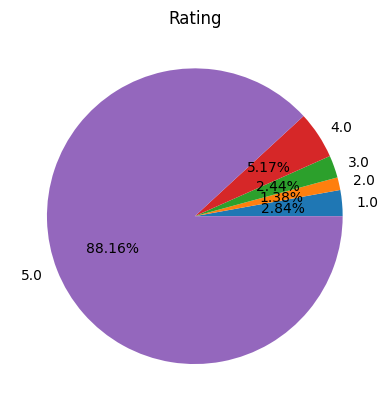

In [13]:
data = df.groupby('rating')['rating'].count()
labels = data.index
y = data.values
plt.pie(y, labels=labels, autopct="%0.2f%%")
plt.title('Rating')
plt.show()

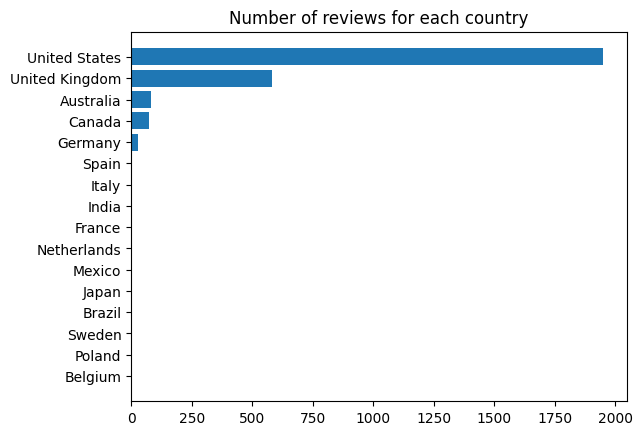

In [14]:
data = df.groupby('country')['country'].count()
data.sort_values(inplace=True)
x = data.index
y = data.values
plt.barh(x, y)
plt.title('Number of reviews for each country')
plt.show()

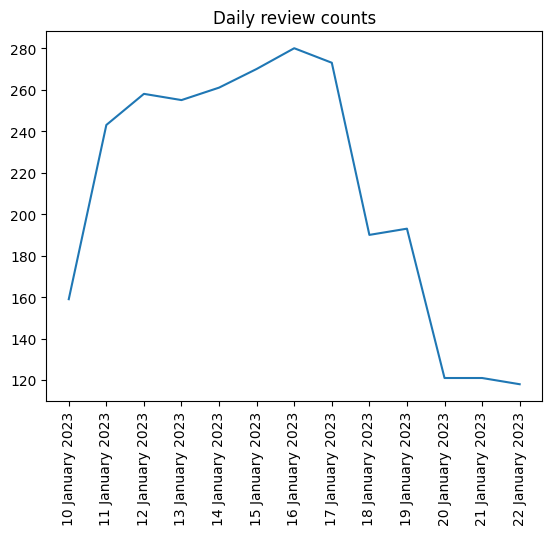

In [24]:
data = df.groupby('time')['time'].count()[:-1]
x = data.index
y = data.values
plt.plot(x,y)
plt.xticks(rotation=90)
plt.title('Daily review counts')
plt.show()

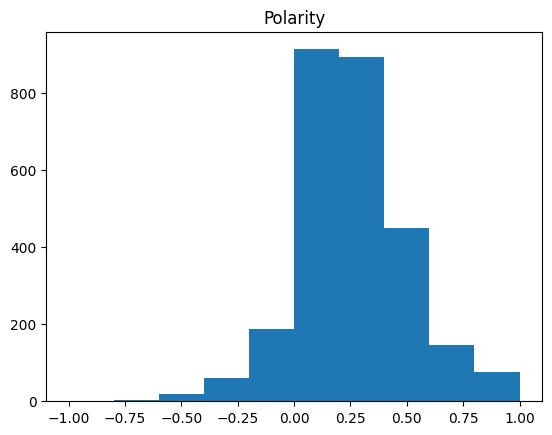

In [23]:
plt.hist(df['polarity'])
plt.title('Polarity')
plt.show()